In [1]:
# Exercise: Student Performance Analysis

In [2]:
'''
In this exercise i am going to import a dataset in which there are different variable to describe students. I will use the data to explain the mark G3 
of the students following the following steps:
    1- Upload dataset
    2- Treat repeted and missing values of the data set of the dataset
    3- Give stadistics of numerical variables, plot one of them and study their correlation
    4- Create new variables
    5- Plot one categorical variable and transform it
    6- Create test and train sets
    7- Perform twoo models
    8- Prove how good are the models
'''

'\nIn this exercise i am going to import a dataset in which there are different variable to describe students. I will use the data to explain the mark G3 \nof the students following the following steps:\n    1- Upload dataset\n    2- Treat repeted and missing values of the data set of the dataset\n    3- Give stadistics of numerical variables, plot one of them and study their correlation\n    4- Create new variables\n    5- Plot one categorical variable and transform it\n    6- Create test and train sets\n    7- Perform twoo models\n    8- Prove how good are the models\n'

In [3]:
#import the libraries which will be used
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from urllib.request import urlopen
import html5lib
from bs4 import BeautifulSoup
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px

In [9]:
#dowload the dataset
dir = 'Downloads/student/student-mat.csv'
stud = pd.read_csv(dir, sep = ';')
pd.options.display.max_columns = None #show all the columns
print(stud.head())#show the dataset first rows

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \


In [10]:
stud.info()#show the structure of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [11]:
stud.isnull().sum() # show the number of NaN of each column

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [12]:
''' it is clear that there aren't missing values'''

" it is clear that there aren't missing values"

In [13]:
stud.duplicated().sum() # show the number of duplicated

0

In [14]:
'''there is no duplicate'''

'there is no duplicate'

In [16]:
#use the function describe to give statistics of numerical colums
stud.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

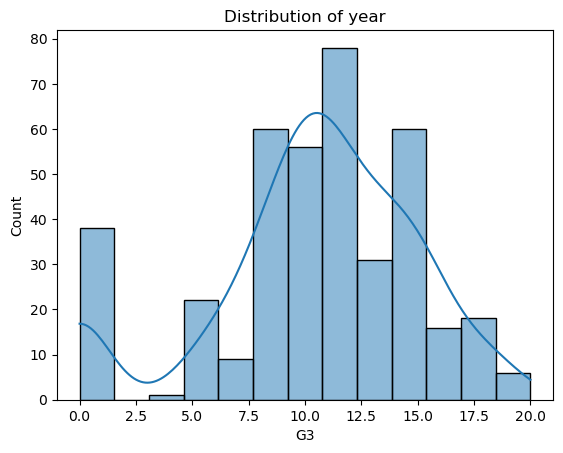

In [17]:
#plot the histogram of the numerical variable G3 to study their distribution
sns.histplot(stud['G3'], kde=True) # create the histogram
plt.title('Distribution of year') # change the title
plt.show() # plot the histogram

In [18]:
'''the histogram don't allow to recognize a distribution'''

"the histogram don't allow to recognize a distribution"

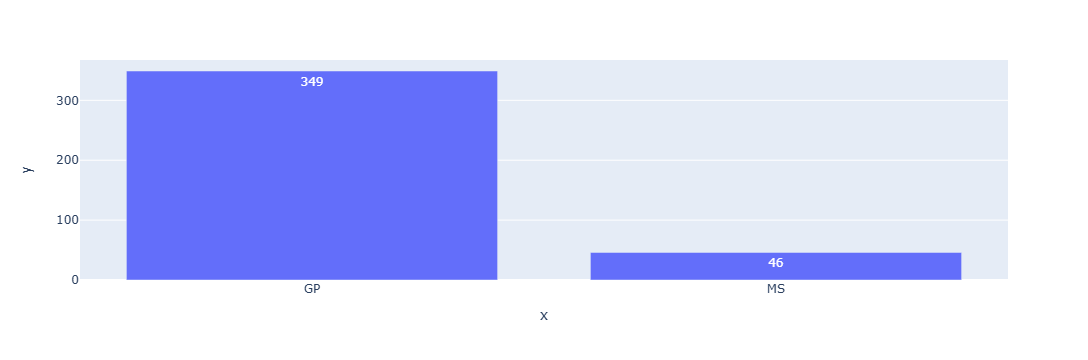

In [19]:
#now use the barplot to show the distribution of the categorical variable school

cut_counts = stud['school'].value_counts()# count the repetitions of each class

fig = px.bar(x=cut_counts.index, y=cut_counts.values,  text_auto = True)# create the barplot to indicate the number of repetitiones of each class
fig.show()#show the barplot

In [ ]:
'''we can see that the mayority of students are of GP '''

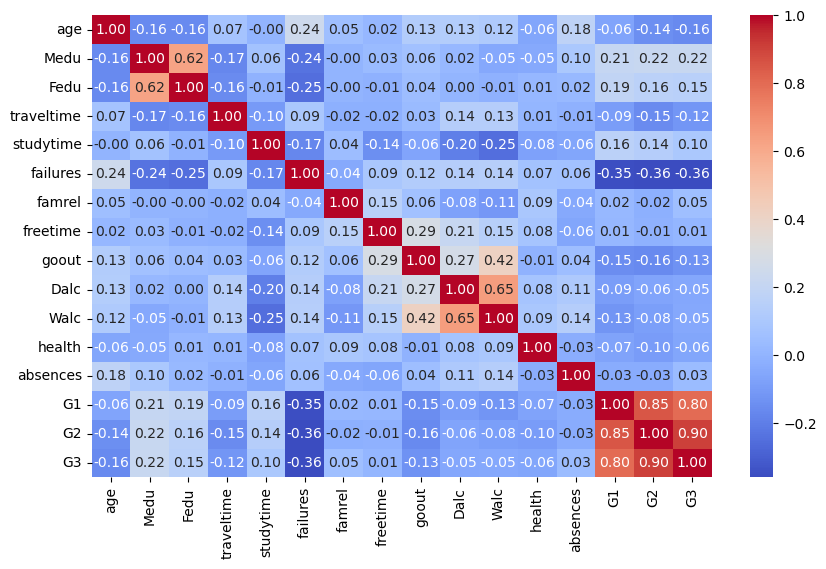

In [20]:
# I am going to see the correlation matrix between the numerical variables
plt.figure(figsize = (10, 6))
corrmat_new=stud.corr()
sns.heatmap(corrmat_new, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [13]:
''' The variables Medu y Fedu have a little relationship with a correlation of 0.62 as the same as Walc y Dalc with a correlation of 0.65
The variables G1, G2, G3 are strongly related among them with a correlation up to 0.8 '''

' The variables Medu y Fedu have a little relationship with a correlation of 0.62 as the same as Walc y Dalc with a correlation of 0.65\nThe variables G1, G2, G3 are strongly related among them with a correlation up to 0.8 '

In [22]:
# create a new variable which divide G3 in three categories (Low, Medium, High)
interval = (max(stud['G3'])-min(stud['G3']))# show the highest difference between two values of G3

G_3_type = [] #create an empty list
for i in stud['G3']: 
    if i > interval*2/3: # check if the value is higher than two thirds of interval
        G_3_type.append('High')
    elif i > interval/3:
        G_3_type.append('Medium') # check if the value is higher than one thirds of interval but lower than two thirds of intervals
    else:
        G_3_type.append('Low') # check if the value is lower than one thirds of interval
        
stud['G3 class'] = G_3_type #add the class

stud

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0    course   mother           2          2         0       yes     no   no   
1    course   father           1          2         0        no    yes   no   
2     other   mother           1          2         3       yes     no  yes   
3      home   mother           1          3         0        no    yes  yes   
4      home   father           1          2         0        no    yes  yes   
..      ...      ...         ...        ...       ...       ...    ...  ...   
390  course    other           1          2         2        no    yes  yes   
391  course   mother           2          1         0        no     no   no   
392  course    other           1          1         3        no     no   no   
393  course   mother           3          1         0        no     no   no   
394  course   father           1          1         0        no     no   no   

    activities nursery higher internet romantic  famrel  freetime  goout  \
0           no     yes    yes       no       no       4         3      4   
1           no      no    yes      yes       no       5         3      3   
2           no     yes    yes      yes       no       4         3      2   
3          yes     yes    yes      yes      yes       3         2      2   
4           no     yes    yes       no       no       4         3      2   
..         ...     ...    ...      ...      ...     ...       ...    ...   
390         no     yes    yes       no       no       5         5      4   
391         no      no    yes      yes       no       2         4      5   
392         no      no    yes       no       no       5         5      3   
393         no      no    yes      yes       no       4         4      1   
394         no     yes    yes      yes       no       3         2      3   

     Dalc  Walc  health  absences  G1  G2  G3 G3 class  
0       1     1       3         6   5   6   6      Low  
1       1     1       3         4   5   5   6      Low  
2       2     3       3        10   7   8  10   Medium  
3       1     1       5         2  15  14  15     High  
4       1     2       5         4   6  10  10   Medium  
..    ...   ...     ...       ...  ..  ..  ..      ...  
390     4     5       4        11   9   9   9   Medium  
391     3     4       2         3  14  16  16     High  
392     3     3       3         3  10   8   7   Medium  
393     3     4       5         0  11  12  10   Medium  
394     3     3       5         5   8   9   9   Medium  

[395 rows x 34 columns]

C:\Users\pablo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



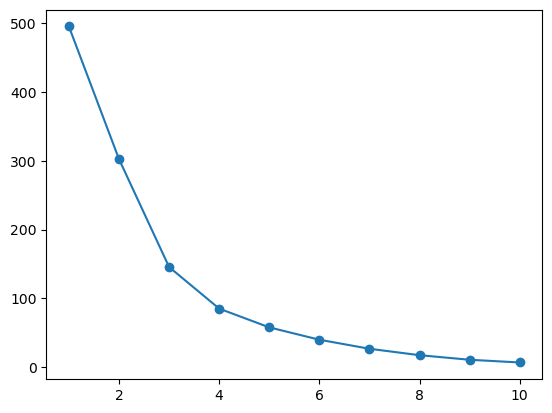

In [23]:
# make a new categorical variable using studytime and failures
cal_new_fea = stud[['studytime', 'failures']] # get the columns studytime and failures

inertia = [] # make an empty list
for k in range(1, 11): #create the variable using K-Means method to get the best number of clusters compare the resuls of the differents cases
    kmeans = KMeans(n_clusters = k,  random_state = 42) # use the K-Means method with k clusters
    kmeans.fit(cal_new_fea) # apply to the data
    inertia.append(kmeans.inertia_) # get the intercia of the case
    
plt.plot(range(1,11),  inertia, marker = 'o') # plot the inertia
plt.show()

In [24]:
''' We can see in the plot that next to the 4 case the inertia decreasing slow down so 4 is the optimal number of clusters'''

' We can see in the plot that next to the 4 case the inertia decreasing slow down so 4 is the optimal number of clusters'

In [25]:
# create the new feature using the optimal number of clusters
optimal_kmeans = KMeans(n_clusters = 4,  random_state = 42)
optimal_kmeans.fit(cal_new_fea)

stud['new feature'] = optimal_kmeans.labels_
stud

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0    course   mother           2          2         0       yes     no   no   
1    course   father           1          2         0        no    yes   no   
2     other   mother           1          2         3       yes     no  yes   
3      home   mother           1          3         0        no    yes  yes   
4      home   father           1          2         0        no    yes  yes   
..      ...      ...         ...        ...       ...       ...    ...  ...   
390  course    other           1          2         2        no    yes  yes   
391  course   mother           2          1         0        no     no   no   
392  course    other           1          1         3        no     no   no   
393  course   mother           3          1         0        no     no   no   
394  course   father           1          1         0        no     no   no   

    activities nursery higher internet romantic  famrel  freetime  goout  \
0           no     yes    yes       no       no       4         3      4   
1           no      no    yes      yes       no       5         3      3   
2           no     yes    yes      yes       no       4         3      2   
3          yes     yes    yes      yes      yes       3         2      2   
4           no     yes    yes       no       no       4         3      2   
..         ...     ...    ...      ...      ...     ...       ...    ...   
390         no     yes    yes       no       no       5         5      4   
391         no      no    yes      yes       no       2         4      5   
392         no      no    yes       no       no       5         5      3   
393         no      no    yes      yes       no       4         4      1   
394         no     yes    yes      yes       no       3         2      3   

     Dalc  Walc  health  absences  G1  G2  G3 G3 class  new feature  
0       1     1       3         6   5   6   6      Low            2  
1       1     1       3         4   5   5   6      Low            2  
2       2     3       3        10   7   8  10   Medium            3  
3       1     1       5         2  15  14  15     High            1  
4       1     2       5         4   6  10  10   Medium            2  
..    ...   ...     ...       ...  ..  ..  ..      ...          ...  
390     4     5       4        11   9   9   9   Medium            3  
391     3     4       2         3  14  16  16     High            0  
392     3     3       3         3  10   8   7   Medium            3  
393     3     4       5         0  11  12  10   Medium            0  
394     3     3       5         5   8   9   9   Medium            0  

[395 rows x 35 columns]

In [27]:
# convert to categorical features to numerical
for k in stud.select_dtypes('object').columns.values: # find and run the vector of categorical variable names
    label_encoder = LabelEncoder()
     
    stud[k] = label_encoder.fit_transform(stud[k])

stud

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0         0    0   18        1        0        0     4     4     0     4   
1         0    0   17        1        0        1     1     1     0     2   
2         0    0   15        1        1        1     1     1     0     2   
3         0    0   15        1        0        1     4     2     1     3   
4         0    0   16        1        0        1     3     3     2     2   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...   
390       1    1   20        1        1        0     2     2     3     3   
391       1    1   17        1        1        1     3     1     3     3   
392       1    1   21        0        0        1     1     1     2     2   
393       1    1   18        0        1        1     3     2     3     2   
394       1    1   19        1        1        1     1     1     2     0   

     reason  guardian  traveltime  studytime  failures  schoolsup  famsup  \
0         0         1           2          2         0          1       0   
1         0         0           1          2         0          0       1   
2         2         1           1          2         3          1       0   
3         1         1           1          3         0          0       1   
4         1         0           1          2         0          0       1   
..      ...       ...         ...        ...       ...        ...     ...   
390       0         2           1          2         2          0       1   
391       0         1           2          1         0          0       0   
392       0         2           1          1         3          0       0   
393       0         1           3          1         0          0       0   
394       0         0           1          1         0          0       0   

     paid  activities  nursery  higher  internet  romantic  famrel  freetime  \
0       0           0        1       1         0         0       4         3   
1       0           0        0       1         1         0       5         3   
2       1           0        1       1         1         0       4         3   
3       1           1        1       1         1         1       3         2   
4       1           0        1       1         0         0       4         3   
..    ...         ...      ...     ...       ...       ...     ...       ...   
390     1           0        1       1         0         0       5         5   
391     0           0        0       1         1         0       2         4   
392     0           0        0       1         0         0       5         5   
393     0           0        0       1         1         0       4         4   
394     0           0        1       1         1         0       3         2   

     goout  Dalc  Walc  health  absences  G1  G2  G3  G3 class  new feature  
0        4     1     1       3         6   5   6   6         1            2  
1        3     1     1       3         4   5   5   6         1            2  
2        2     2     3       3        10   7   8  10         2            3  
3        2     1     1       5         2  15  14  15         0            1  
4        2     1     2       5         4   6  10  10         2            2  
..     ...   ...   ...     ...       ...  ..  ..  ..       ...          ...  
390      4     4     5       4        11   9   9   9         2            3  
391      5     3     4       2         3  14  16  16         0            0  
392      3     3     3       3         3  10   8   7         2            3  
393      1     3     4       5         0  11  12  10         2            0  
394      3     3     3       5         5   8   9   9         2            0  

[395 rows x 35 columns]

In [28]:
# I am going to split the dataset into training and testing sets
# first i separate the predictive variable Y and the predictors variables X
y= stud['G3']
x = stud.drop(['G3', 'G3 class', 'new feature'], axis=1)
#create the training and testing sets using to create de testing set the 30% of data
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=23)


In [29]:
#set that I will use a Random Forest model 
modelo1 = RandomForestClassifier(n_estimators=100, random_state=42)
#train the model
modelo1.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [30]:
#now i am going to make predictions using the Random Forest model 
y_pred1 = modelo1.predict(x_test)

In [31]:
# i am going to study the accuracy of the Random Forest model  using the MAE, MSE, R-squared
MAE_1 = mean_absolute_error(y_test, y_pred1)#calculate MAE
MSE_1 = mean_squared_error(y_test, y_pred1)#calculate MSE
R2_1 = r2_score(y_test, y_pred1)#calculate R-squared
print('MAE value: ', MAE_1)
print('MSE value: ',MSE_1)
print('R-squared value: ',R2_1)

MAE value:  1.453781512605042
MSE value:  6.949579831932773
R-squared value:  0.6859927889984365


In [32]:
''' Using a random forest we see that the model explain the 69% of the variability so this is a good model but could be better'''

' Using a random forest we see that the model explain the 69% of the variability so this is a good model but could be better'

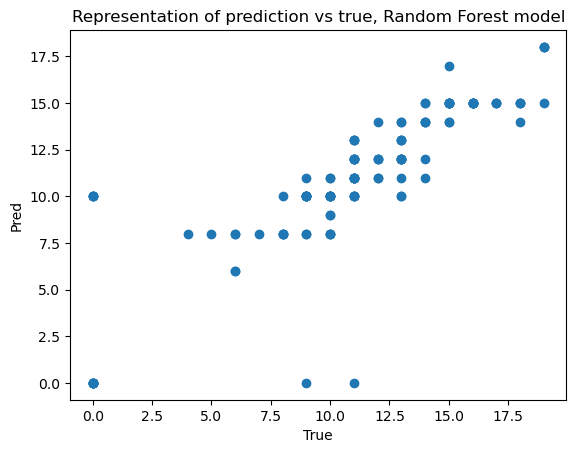

In [33]:
#plot the predicted values and the true values of the Random Forest model 
plt.scatter(y_test, y_pred1)
plt.title(u'Representation of prediction vs true, Random Forest model')
plt.xlabel('True')
plt.ylabel('Pred')
plt.show()

In [34]:
#set that I will use a Decision Tree model 
modelo2 = DecisionTreeClassifier()
#train the model
modelo2.fit(x_train,y_train)



DecisionTreeClassifier()

In [35]:
fig, ax = plt.subplots(figsize=(300, 90))

print(f"Tree deep: {modelo2.get_depth()}")# show the number of rows
print(f"Terminal node number: {modelo2.get_n_leaves()}")# show the number of terminal node

plot = plot_tree(
            decision_tree = modelo2,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       ) # plot the tree

Tree deep: 10
Terminal node number: 98


In [36]:
#now i am going to make predictions using the Decision Tree model 
y_pred2 = modelo2.predict(x_test)

In [37]:
# i am going to study the accuracy of the Decision Tree model  using the MAE, MSE, R-squared 
MAE_2 = mean_absolute_error(y_test, y_pred2)#calculate MAE
MSE_2 = mean_squared_error(y_test, y_pred2)#calculate MSE
R2_2 = r2_score(y_test, y_pred2)#calculate R-squared
print('MAE value: ', MAE_2)
print('MSE value: ',MSE_2)
print('R-squared value: ',R2_1)

MAE value:  1.3277310924369747
MSE value:  5.697478991596639
R-squared value:  0.6859927889984365


In [38]:
''' As we saw in the random forest this model explain the 69% of the variability so this is a good model but could be better'''

' As we saw in the random forest this model explain the 69% of the variability so this is a good model but could be better'

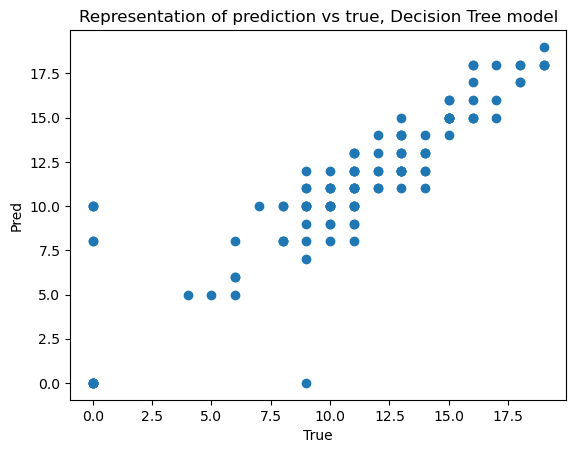

In [39]:
#plot the predicted values and the true values of the Decision Tree model 
plt.scatter(y_test, y_pred2)
plt.title(u'Representation of prediction vs true, Decision Tree model')
plt.xlabel('True')
plt.ylabel('Pred')
plt.show()

In [ ]:
'''
Suggestions

I think that some variables could be good to the study

1- studcon: this variables should be a categorical variables that indicate if the student
use a phone, laptop or other device during studytime to listen music or other things which are not related to study (yes or no)

2- homeworks: indicate de number of times that the student show how he/she did his/her homework (n>=0)

3- question: it is a number to say the number of time the student has asked for doubts
'''